In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
df.head()


Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [4]:
df.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

In [5]:
df.shape
print(df.shape)

(19689, 10)


# Preprocessing of data


In [6]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Niger seed', 'Cotton(lint)', 'Ragi', 'Tobacco', 'Safflower', 'Moth', 'Guar seed', 'Mesta', 'Sweet potato', 'Masoor', 'Oilseeds total', 'Potato', 'Cowpea(Lobia)', 'Urad', 'Barley', 'Peas & beans (Pulses)', 'Onion', 'Banana', 'Gram', 'Soyabean', 'Groundnut', 'Bajra', 'Garlic', 'Other Cereals', 'Horse-gram', 'Rapeseed &Mustard', 'Turmeric', 'Khesari', 'Cardamom', 'Moong(Green Gram)', 'other oilseeds', 'Small millets', 'Cashewnut', 'Sugarcane', 'Tapioca', 'Wheat', 'Jute', 'Coriander', 'Jowar', 'Other  Rabi pulses', 'Dry chillies', 'Black pepper', 'Ginger', 'Sesamum', 'Other Summer Pulses', 'Sannhamp', 'Coconut ', 'Sunflower', 'Arecanut', 'Castor seed', 'Maize', 'Linseed', 'Other Kharif pulses', 'Arhar/Tur', 'Rice'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [9]:
# Check the duplicates record
df.duplicated().sum()

0

In [10]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

# Visualization


<Axes: xlabel='Crop_Year', ylabel='Yield'>

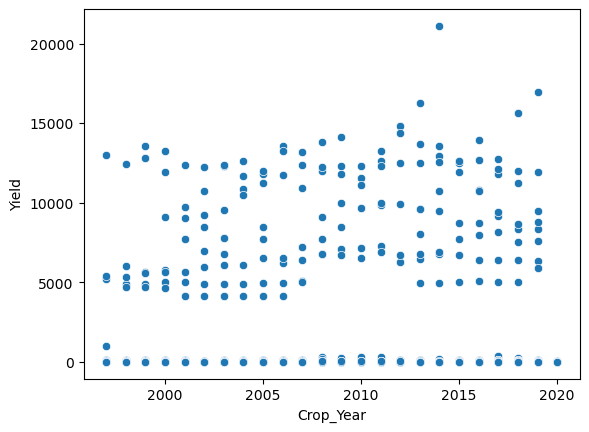

In [11]:
sns.scatterplot(x =df['Crop_Year'],y=df['Yield'])

<Axes: xlabel='Annual_Rainfall', ylabel='Yield'>

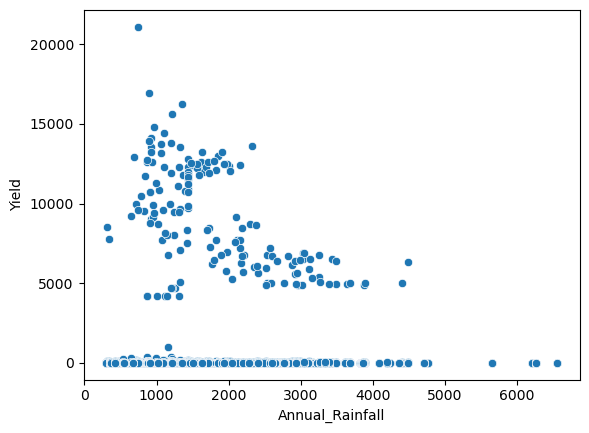

In [12]:
sns.scatterplot(x =df['Annual_Rainfall'],y=df['Yield'])

In [13]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [14]:
year_yield = df_year.groupby('Crop_Year').sum() 


In [15]:
year_yield

Area   Production  Annual_Rainfall    Fertilizer  \
Crop_Year                                                             
1997       1.660686e+08   6087009873     6.542691e+05  1.580475e+10   
1998       1.501238e+08   7868086697     1.138474e+06  1.483223e+10   
1999       1.470574e+08   8550025528     1.033857e+06  1.560720e+10   
2000       1.475277e+08   9562470060     1.119624e+06  1.448280e+10   
2001       1.456943e+08   9314563490     1.055077e+06  1.487976e+10   
2002       1.427858e+08  12409349456     1.040622e+06  1.351753e+10   
2003       1.496968e+08  12313711969     1.135610e+06  1.481699e+10   
2004       1.480245e+08  13817065380     1.141189e+06  1.603697e+10   
2005       1.479183e+08  14951210018     1.185828e+06  1.773836e+10   
2006       1.522491e+08  15702675600     1.120933e+06  1.944373e+10   
2007       1.524861e+08  14471191552     1.282614e+06  2.034164e+10   
2008       1.509647e+08  16165771744     1.160613e+06  2.159398e+10   
2009       1.486685e+08  16604163998     1.022008e+06  2.316552e+10   
2010       1.581894e+08  11952654246     1.260904e+06  2.627684e+10   
2011       1.544121e+08  19260119964     1.253200e+06  2.586711e+10   
2012       1.585360e+08  13030757834     1.128220e+06  2.390723e+10   
2013       1.575644e+08  17040254359     1.400296e+06  2.276649e+10   
2014       1.544366e+08  17729042495     1.246912e+06  2.331374e+10   
2015       1.559359e+08  18329298670     1.353716e+06  2.462384e+10   
2016       1.603649e+08  16357287264     1.554648e+06  2.457592e+10   
2017       1.625001e+08  15873843241     1.596034e+06  2.558402e+10   
2018       1.613595e+08  17933914698     1.734000e+06  2.617252e+10   
2019       1.690919e+08  18272602364     1.640698e+06  2.904323e+10   

              Pesticide          Yield  
Crop_Year                               
1997       5.148126e+07   26187.756592  
1998       4.353590e+07   36136.246483  
1999       3.970550e+07   50013.419395  
2000       3.835721e+07   58342.279827  
2001       3.788053e+07   56581.195447  
2002       3.569644e+07   65734.814831  
2003       3.592724e+07   67039.368873  
2004       3.108514e+07   63905.917053  
2005       3.106285e+07   70140.586280  
2006       3.349481e+07   63765.246251  
2007       2.439777e+07   63548.814332  
2008       1.358682e+07   72534.452889  
2009       2.527364e+07   74346.506928  
2010       3.796545e+07   62000.578526  
2011       5.095598e+07   76228.823500  
2012       4.914617e+07   68448.386183  
2013       4.254240e+07   92591.163834  
2014       5.096406e+07  103400.057624  
2015       5.145886e+07   82077.740509  
2016       5.612772e+07   80860.122961  
2017       6.175004e+07   79981.909996  
2018       5.647583e+07   79994.686005  
2019       6.256401e+07   80190.867894

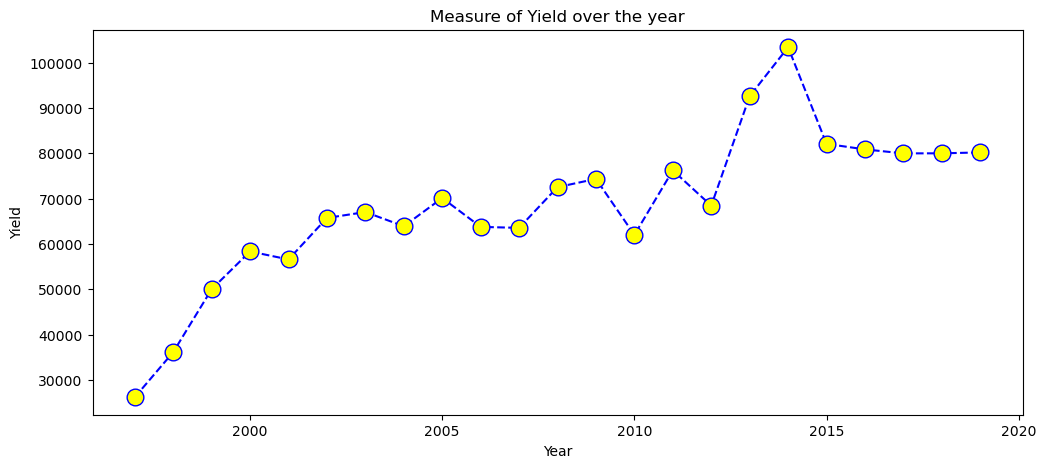

In [16]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

In [17]:
# It can be observed that the yield has increased over the year, but after 2014 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility

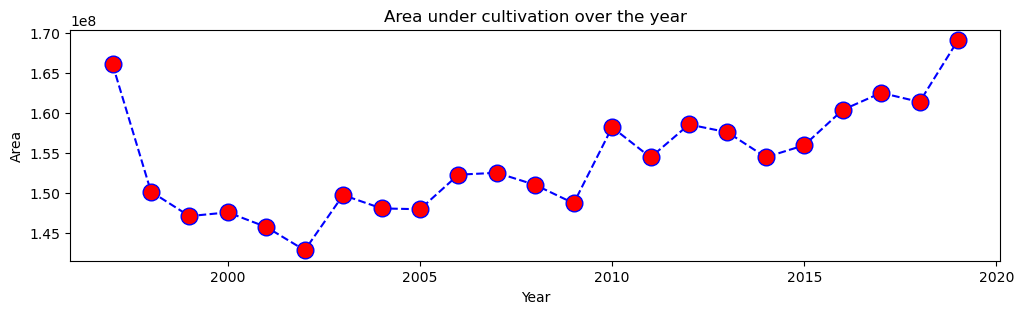

In [18]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

 # It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture.¶ 

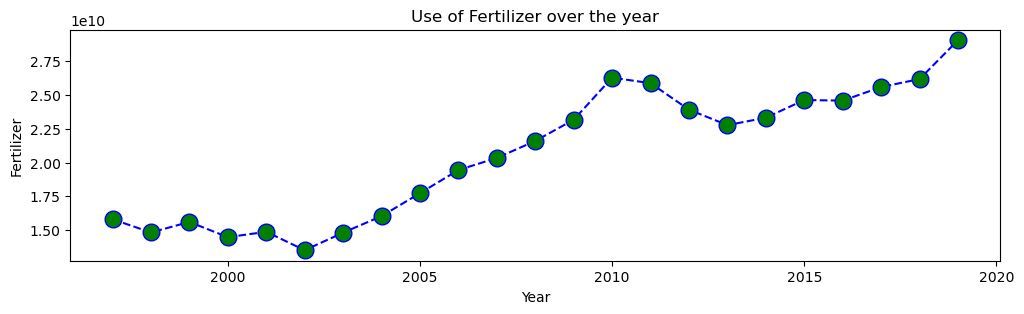

In [19]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

# The use of Fertilizer in the fields is increasing¶

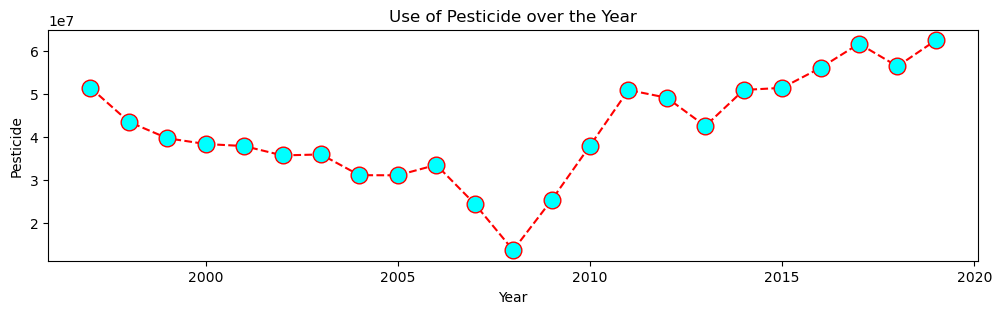

In [20]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

# use of pesticides is ncresing over the year


#State wise analysis of agricultural production

In [21]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

Crop_Year          Area    Production  Annual_Rainfall  \
State                                                                       
West Bengal          2196856  2.376823e+08    8941179120     1.883456e+06   
Puducherry           1346899  6.535410e+05     493815573     9.599160e+05   
Andhra Pradesh       2543550  2.389253e+08   26076218605     1.160140e+06   
Tamil Nadu           1652030  1.103728e+08   78051759253     7.654142e+05   
Assam                1468138  7.734260e+07    3637714928     1.531493e+06   
Karnataka            2876568  2.579074e+08   63772797366     1.692393e+06   
Kerala               1072892  3.639106e+07  129700649853     1.536641e+06   
Goa                   494067  2.749600e+06    2193998349     8.247461e+05   
Telangana             800319  3.979214e+07     147700034     3.955095e+05   
Gujarat              1641081  2.224343e+08     807581678     6.411799e+05   
Uttar Pradesh        1657261  5.426726e+08    4442585302     6.255756e+05   
Haryana              1267508  1.315070e+08     589739640     2.946222e+05   
Maharashtra          1546539  4.619396e+08    1878564915     9.056708e+05   
Bihar                1799058  1.679954e+08     544953534     1.042240e+06   
Madhya Pradesh       1697425  4.920880e+08     834490323     8.478293e+05   
Uttarakhand          1535612  2.247189e+07     179697348     1.087097e+06   
Delhi                 407560  7.979030e+05       2666022     1.284794e+05   
Odisha               1525934  1.246467e+08     194080325     1.098412e+06   
Nagaland             1384791  8.426732e+06      18748702     1.064884e+06   
Manipur               891535  5.727639e+06      18764635     6.868441e+05   
Punjab                797278  1.620402e+08     781551409     2.020578e+05   
Tripura               886679  6.278528e+06      16952054     1.015520e+06   
Meghalaya            1303721  5.178776e+06      16516629     2.623959e+06   
Chhattisgarh         1838861  1.105362e+08     143096606     1.159347e+06   
Himachal Pradesh     1237740  1.781021e+07      32297151     7.068515e+05   
Arunachal Pradesh     586807  5.725531e+06       9522010     7.620470e+05   
Mizoram               835617  1.542189e+06       2769208     1.013275e+06   
Jharkhand             543138  3.043553e+07      43793850     3.194565e+05   
Jammu and Kashmir    1268456  1.874319e+07      30298377     7.520082e+05   
Sikkim                453793  1.759399e+06       2744927     5.808958e+05   

                     Fertilizer     Pesticide          Yield  
State                                                         
West Bengal        2.970480e+10  6.612665e+07  291986.752179  
Puducherry         8.480729e+07  1.705159e+05  232163.600840  
Andhra Pradesh     3.125890e+10  6.210724e+07  229735.184723  
Tamil Nadu         1.473239e+10  2.956305e+07  185813.281648  
Assam              1.029304e+10  2.093547e+07  160612.648362  
Karnataka          3.458024e+10  6.917312e+07  151391.867808  
Kerala             4.744603e+09  9.647595e+06  147710.353263  
Goa                3.581078e+08  7.506114e+05   87275.955000  
Telangana          6.262533e+09  1.356572e+07   39508.727733  
Gujarat            2.993028e+10  6.006711e+07    5471.634563  
Uttar Pradesh      7.245282e+10  1.471335e+08    4168.818513  
Haryana            1.764513e+10  3.571026e+07    3491.154048  
Maharashtra        6.238907e+10  1.246885e+08    3388.793109  
Bihar              2.220212e+10  4.531080e+07    3114.942771  
Madhya Pradesh     6.708800e+10  1.359908e+08    2921.854255  
Uttarakhand        3.126579e+09  6.007196e+06    2853.699791  
Delhi              1.045319e+08  2.108490e+05    2663.090000  
Odisha             1.663862e+10  3.338555e+07    2387.350672  
Nagaland           1.160796e+09  2.321707e+06    2344.345829  
Manipur            8.009821e+08  1.556678e+06    2316.347595  
Punjab             2.165230e+10  4.375276e+07    1926.568436  
Tripura            8.561746e+08  1.712264e+06    1891.456560  
Meghalaya          6.978065e+08  1.423262e

In [22]:
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

In [23]:
### From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers


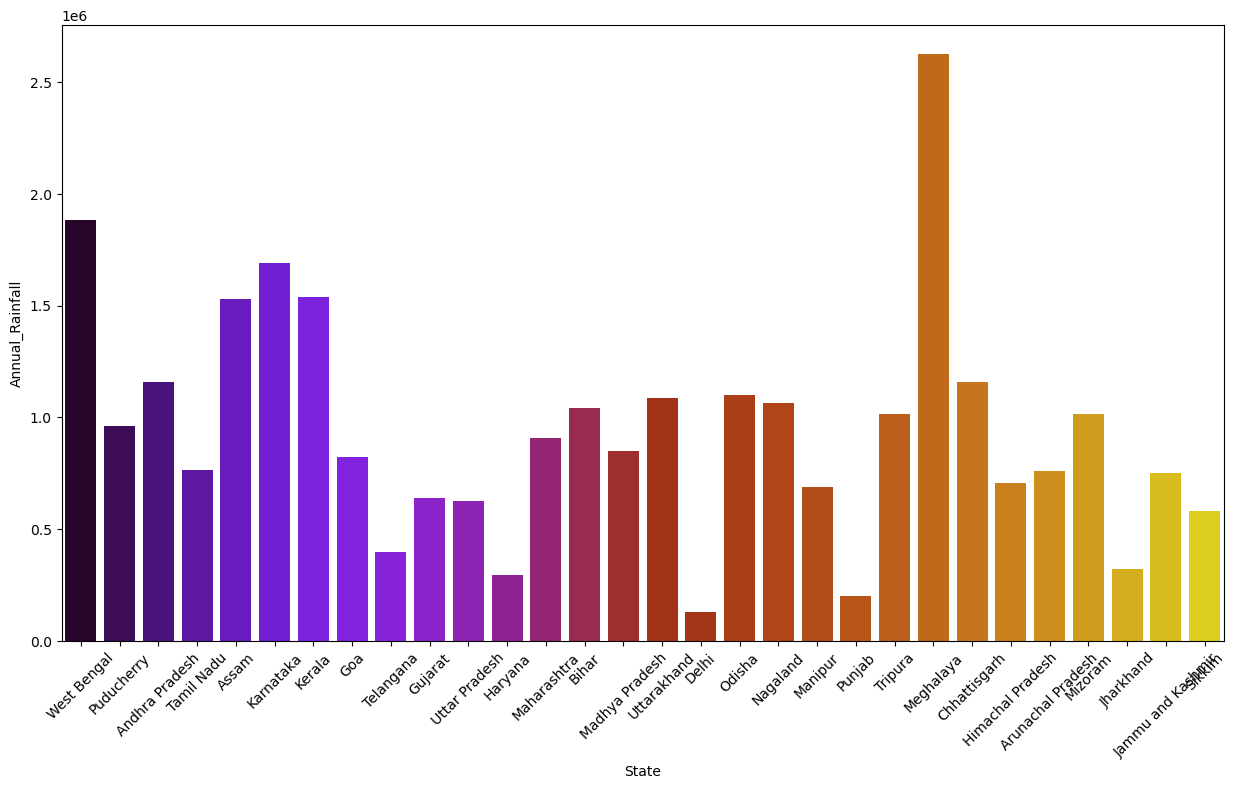

In [24]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

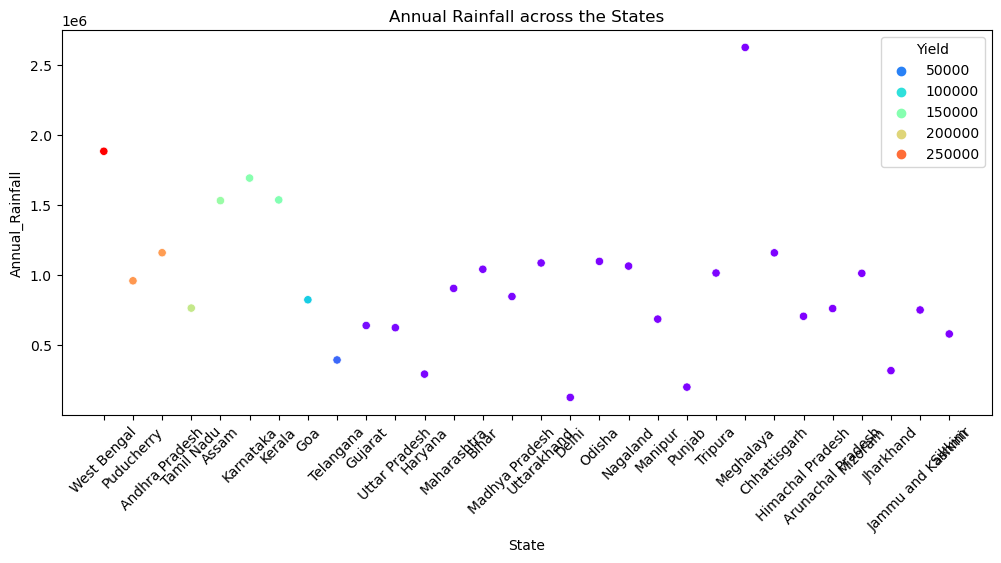

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

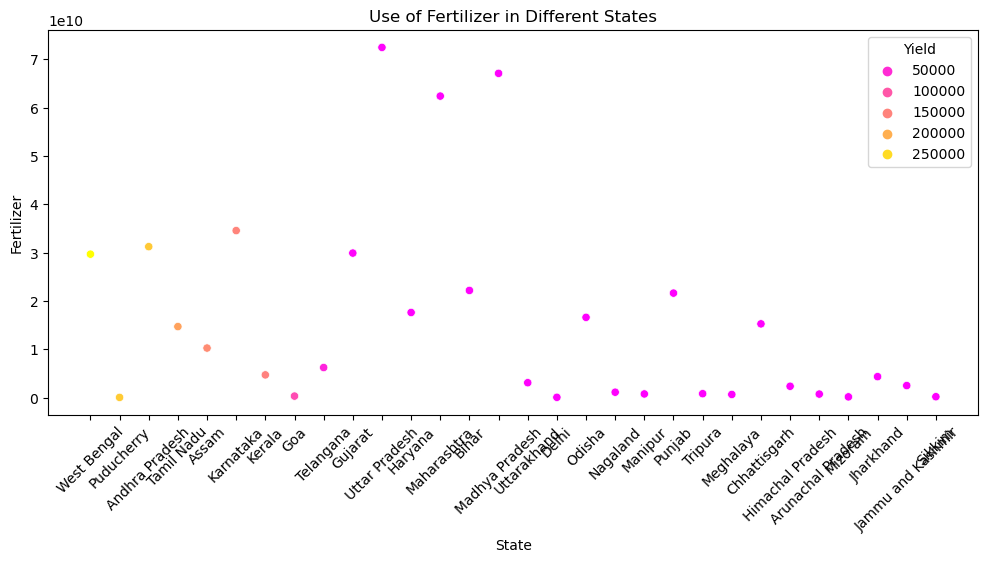

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

# Observations:¶
Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
West Bengal has the maximum yield
Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall

# Season wise analysis

In [27]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

Crop_Year          Area  Production  Annual_Rainfall  \
Season                                                              
Autumn          832058  5.862637e+07    84406651     7.031759e+05   
Kharif        16538965  1.702742e+09  5402484780     1.131835e+07   
Rabi          11539594  1.172588e+09  2837368229     7.970757e+06   
Summer         2402524  9.879112e+07   243731156     1.565900e+06   
Winter          781718  2.806847e+08   586507936     6.709910e+05   

               Fertilizer     Pesticide         Yield  
Season                                                 
Autumn       7.696200e+09  1.552829e+07   1621.837556  
Kharif       2.282723e+11  4.624902e+08  20431.840607  
Rabi         1.564345e+11  3.218366e+08  11418.068860  
Summer       1.371903e+10  2.732111e+07   3581.857123  
Winter       3.811857e+10  7.590270e+07   2056.746957

In [28]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [29]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])                
fig.show()

# Observations:
.Area under cultivation in Kharif season is highest, second is Rabi season
.Crops in autumn, summer are not grown over large area
.Yield in India is maximum in Kharif season

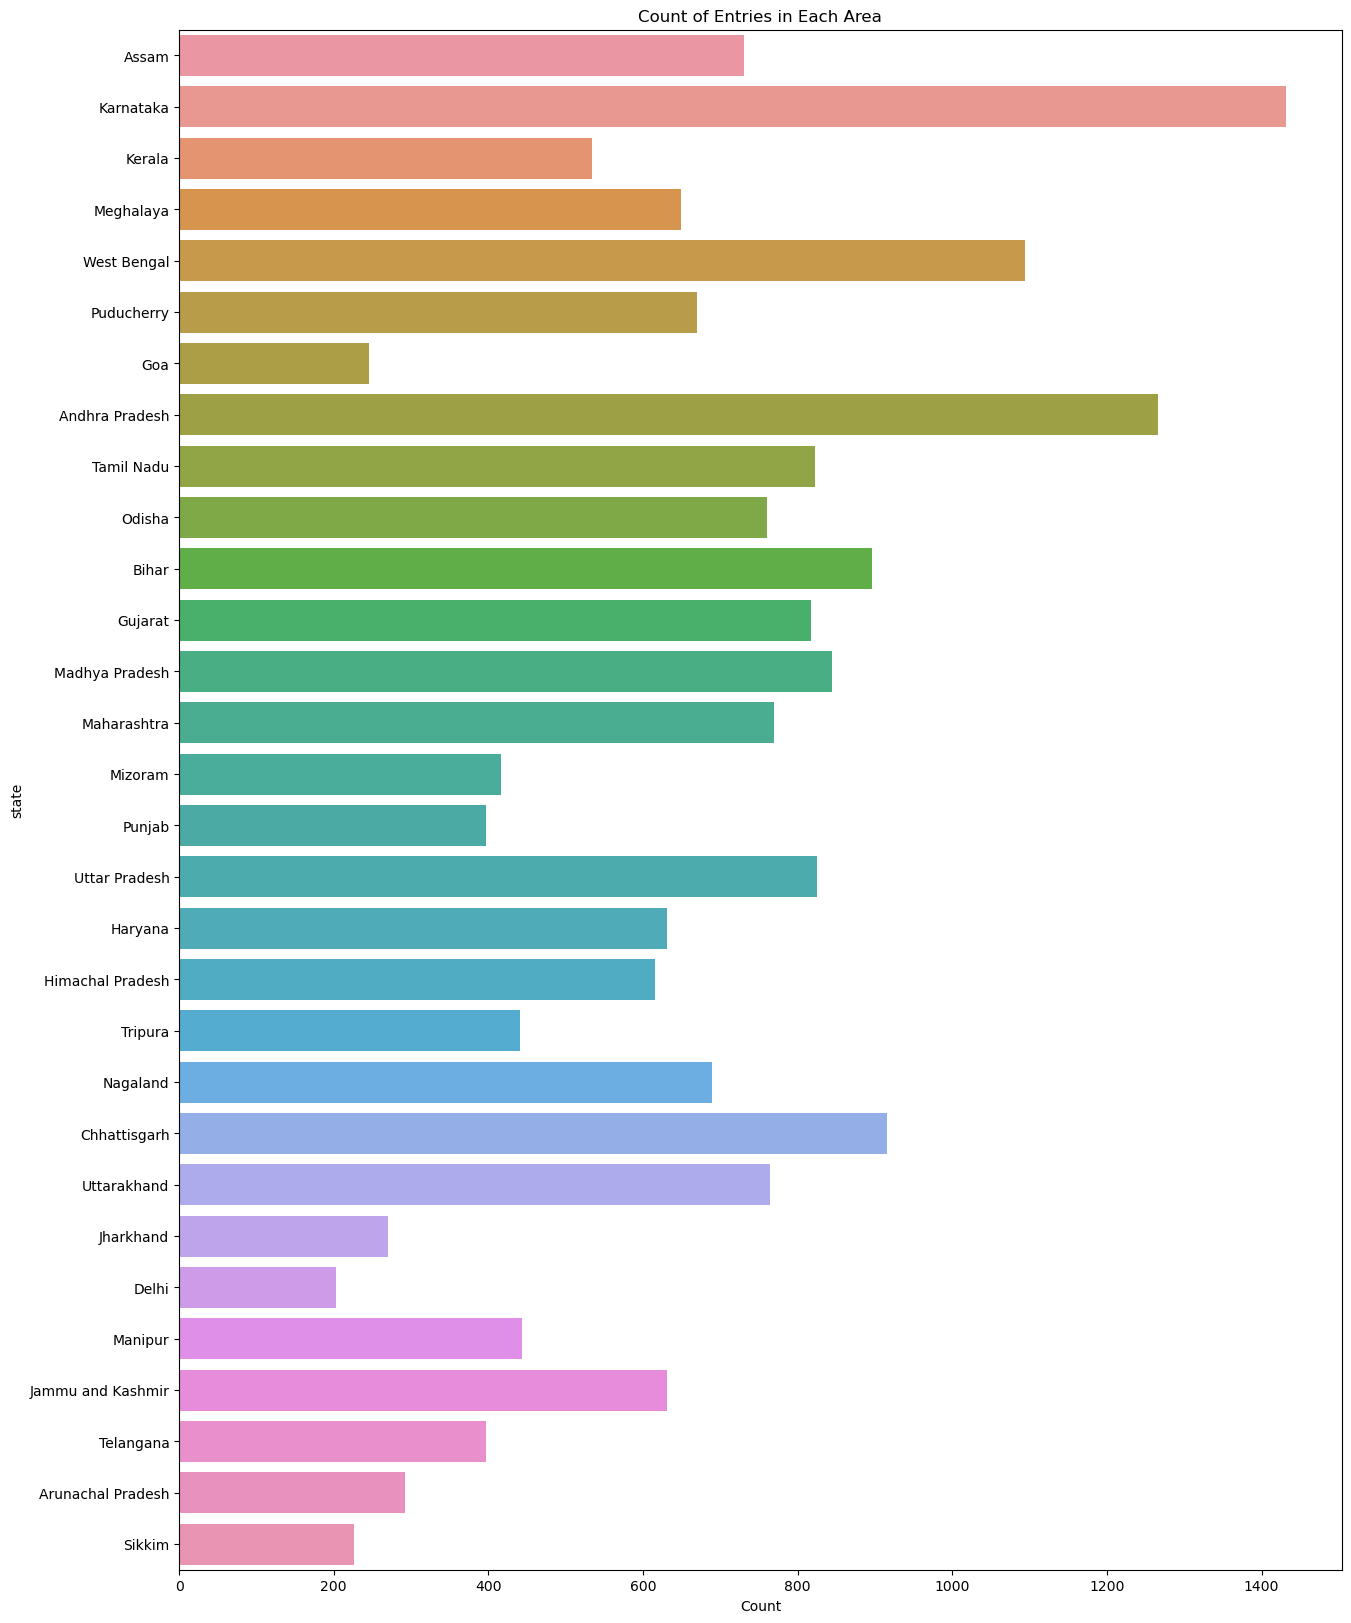

In [30]:

plt.figure(figsize=(15, 20))
# Create a count plot to visualize the distribution of crop entries across different state
sns.countplot(y=df['State'])
plt.xlabel("Count")
plt.ylabel("state")
# Set the title of the plot
plt.title("Count of Entries in Each Area")
plt.show()

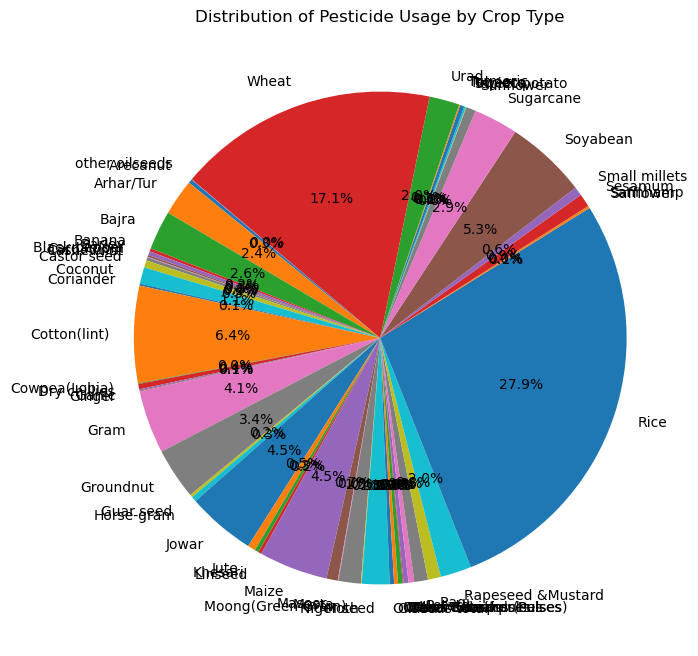

In [31]:
pesticide_by_crop = df.groupby('Crop')['Pesticide'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(20, 8))
plt.pie(pesticide_by_crop['Pesticide'], labels=pesticide_by_crop['Crop'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pesticide Usage by Crop Type')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Correlation between yield and average rainfall per year: 0.020760951693660094


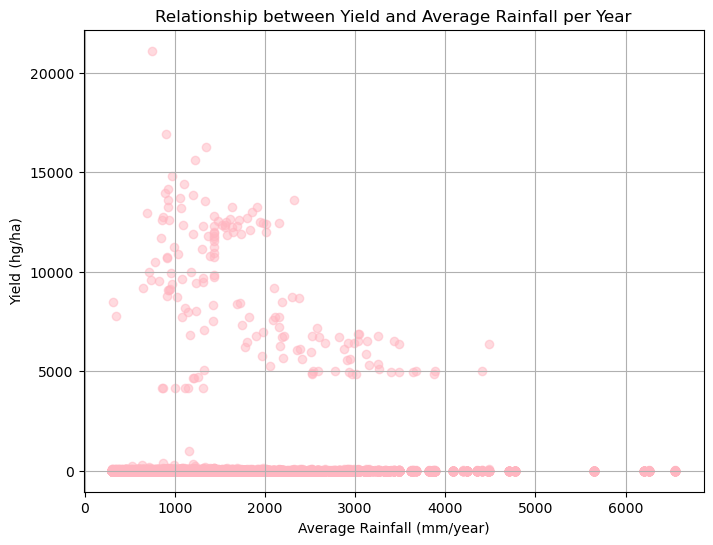

In [32]:
# Calculate the correlation between crop yield and average rainfall per year
correlation = df['Yield'].corr(df['Annual_Rainfall'])

# Print the correlation coefficient
print("Correlation between yield and average rainfall per year:", correlation)

# Create a scatter plot to visualize the relationship between yield and average rainfall
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual_Rainfall'], df['Yield'], color='lightpink', alpha=0.5)
plt.title('Relationship between Yield and Average Rainfall per Year')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

Correlation between yield and pesticides_tonnes: 0.001781633721747211


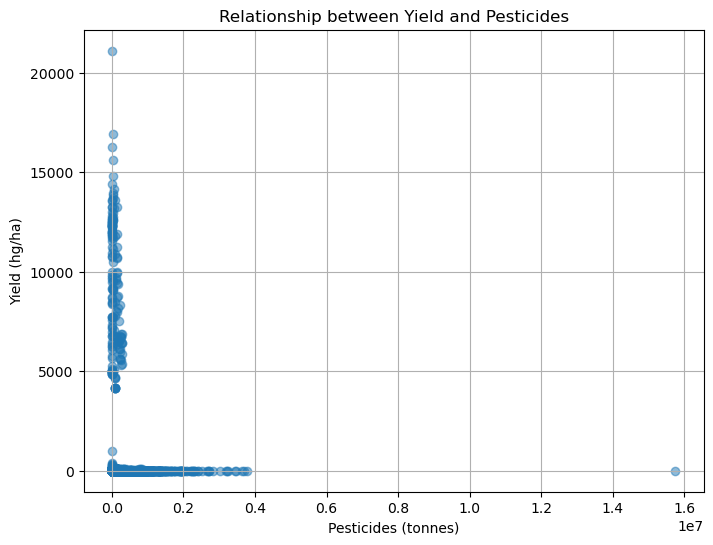

In [33]:
# Calculate correlation between yield and pesticides_tonnes
correlation = df['Yield'].corr(df['Pesticide'])

print("Correlation between yield and pesticides_tonnes:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['Pesticide'], df['Yield'], alpha=0.5)
plt.title('Relationship between Yield and Pesticides')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

Correlation between yield and Area: 0.0018584837778865676


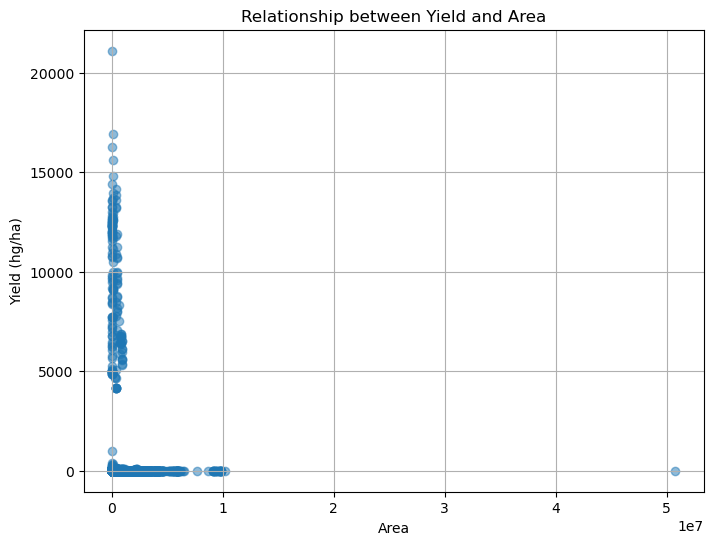

In [34]:
# Calculate correlation between yield and pesticides_tonnes
correlation = df['Yield'].corr(df['Area'])

print("Correlation between yield and Area:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['Area'], df['Yield'], alpha=0.5)
plt.title('Relationship between Yield and Area')
plt.xlabel('Area')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

In [35]:
# Selecting the relevant columns for analysis
col = ['Crop_Year', 'Annual_Rainfall','Pesticide', 'Area', 'Crop', 'Yield']
df = df[col]

# Separating features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (independent variables)
y = df.iloc[:, -1]   # Target variable (dependent variable)

# Displaying the first 5 rows of the modified DataFrame
df.head(20)

# Splitting the data into training and testing sets
# train_size=0.8 specifies that 80% of the data will be used for training, and random_state=0 ensures reprodcibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [36]:
# Initialize OneHotEncoder to encode categorical variables and drop the first category to avoid multicollinearity
ohe = OneHotEncoder(handle_unknown='ignore')

# Initialize StandardScaler to scale numerical features to have zero mean and unit variance
scale = StandardScaler()

# Create a ColumnTransformer to apply transformations to different columns
preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0, 1, 2]),  # Apply StandardScaler to numerical features
        ('OHE', ohe, [3, 4]),  # Apply OneHotEncoder to categorical features
    ],
    remainder='passthrough'  # Passthrough remaining columns without any transformation
)

In [37]:
# Apply the preprocessing transformations to the training data
X_train_dummy = preprocesser.fit_transform(X_train)

# Apply the same transformations to the testing data
X_test_dummy = preprocesser.transform(X_test)

# Get the feature names after preprocessing
# col[:-1] selects all columns except the target variable 'yield'
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Crop_Year', 'StandardScale__Annual_Rainfall',
       'StandardScale__Pesticide', ..., 'OHE__Crop_Urad',
       'OHE__Crop_Wheat', 'OHE__Crop_other oilseeds'], dtype=object)

In [38]:
# Transform the data using the preprocesser
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = lr.predict(X_train_dummy)
y_test_pred = lr.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")

# Calculate R squared for training and test set
train_r_squared = lr.score(X_train_dummy, y_train) * 100
test_r_squared = lr.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)

Train RMSE: 187.80535299932203
Test RMSE: 430.2597915045563

R squared for train is : 95.42164768918079
R squared for test is : 76.12417712081042


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = rf.predict(X_train_dummy)
y_test_pred = rf.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")

# Calculate R squared for training and test set
train_r_squared = rf.score(X_train_dummy, y_train) * 100
test_r_squared = rf.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = dt.predict(X_train_dummy)
y_test_pred = dt.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_dt= mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")

# Calculate R squared for training and test set
train_r_squared = dt.score(X_train_dummy, y_train) * 100
test_r_squared = dt.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)

In [ ]:
svr = SVR()
svr.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = svr.predict(X_train_dummy)
y_test_pred = svr.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_svr= mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_svr= mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")

# Calculate R squared for training and test set
train_r_squared = svr.score(X_train_dummy, y_train) * 100
test_r_squared = svr.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)

In [ ]:
import matplotlib.pyplot as plt

# Store performance metrics of each model
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(X_test_dummy, y_test) * 100),
    "Random Forest": (test_rmse_rf, rf.score(X_test_dummy, y_test) * 100),
    "Linear Regression": (test_rmse_lr, lr.score(X_test_dummy, y_test) * 100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(X_test_dummy, y_test) * 100)
}

# Sort the models based on RMSE and R squared
sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], -x[1][1]))

# Print sorted models and their performance metrics
print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

# Choose the best model
best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

# Visualize the performance of the models using a bar graph
model_names = [model[0] for model in sorted_models]
r2_values = [model[1][1] for model in sorted_models]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='skyblue')
plt.xlabel('R squared (%)')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
def prediction(Crop_Year,Annual_Rainfall,Pesticide,Area,Crop):
    # Assuming preprocesser and rf are defined elsewhere in your code
    # Create an array of the input features
    features = np.array([ [Crop_Year, Annual_Rainfall,Pesticide, Area, Crop]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = rf.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

# Taking user input
Crop_Year = int(input("Enter the year: "))
Annual_Rainfall = float(input("Enter the average rainfall in mm per year: "))
Pesticide = float(input("Enter the pesticides in tonnes: "))
#avg_temp = float(input("Enter the average temperature: "))
Area = input("Enter the area: ")
Crop= input("Enter the item: ")

# Calling the prediction function with user input
result = prediction(Crop_Year,Annual_Rainfall,Pesticide,Area,Crop)
print("Predicted yield:", result)

In [ ]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))